In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [8]:
os.getcwd()


'/home/tommy/Documents/Data Science/First ML project'

In [9]:
df = pd.read_csv('/home/tommy/Documents/Data Science/First ML project/US accidents data set/US_Accidents_June20.csv')

In [10]:
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [11]:
#Evaluating the cleanliness of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513740 entries, 0 to 3513739
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [12]:
#What columns are in the data?
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

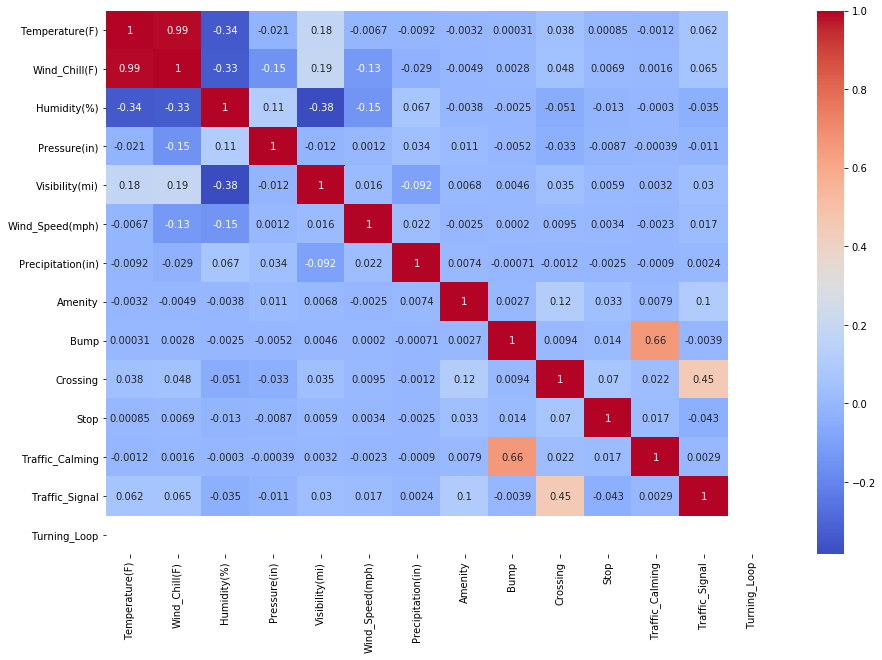

In [13]:
#Heatmap visualization for correlations between conditions of the accidents
df_conditions = df[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                   'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
                   'Amenity', 'Bump', 'Crossing', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
                   'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight']]
corrMatrix = df_conditions.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm')

In [10]:
#Notes on the heatmap
#Humidity + Visibility are negatively correlated
#Traffic calming and a bump are highly correlated
#Traffic signal and crossing are highly correlated 


In [15]:
#Question 2: Overlay a map of the US to the lat and long of these accidents
df_lat_lng = df[['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng']]
df_test = df[['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng']]


In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat

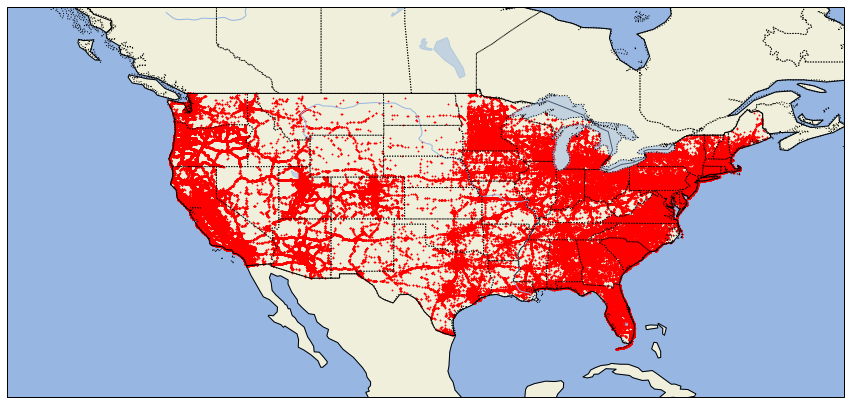

In [ ]:
fig = plt.figure(figsize = (15, 15))

#Features of the US map
ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS, linestyle = '-')
ax.add_feature(cfeat.LAKES, alpha = 0.5)
ax.add_feature(cfeat.RIVERS)

ax.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features

ax.scatter(df_lat_lng['Start_Lng'], df_lat_lng['Start_Lat'], transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r' )
fig

In [ ]:

#Summary: This plot is okay for describing places where a lot of traffic accidents happen. There seems to be a lot of accidents on the west and east coats but not so much in the middle of the united states. 
#I wonder if this is due to less population in those areas or what
#Additionally, I wonder if the dataset can be split into monthly data so that it can be more accurate to those areas
#as it is very hard to tell.

#Perhaps bokeh or plotly can allow more interactivitiy to zoom onto a more state by state or county by county region
#Not sure if I want to do that now or not.

#How to go depeer into the map visualization?
#State by state map visualizations
#Year by year map visualization
#Wish this was interactive but not sure if I want to spend time committing to that? Maybe next time
#Let's just try to see if we can go by yr by yr for now

In [ ]:
fig = plt.figure(figsize = (15, 15))

#Features of the US map
ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS, linestyle = '-')
ax.add_feature(cfeat.LAKES, alpha = 0.5)
ax.add_feature(cfeat.RIVERS)

ax.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of featuresfrom datetime import datetime

In [16]:
#Solution 2
a = pd.to_datetime(df['Start_Time'][1])
df_lat_lng['Start_Time_Test'] = a


/home/tommy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
a = pd.to_datetime(df_lat_lng['Start_Time'])
a

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
3513735   2019-08-23 18:03:25
3513736   2019-08-23 19:11:30
3513737   2019-08-23 19:00:21
3513738   2019-08-23 19:00:21
3513739   2019-08-23 18:52:06
Name: Start_Time, Length: 3513740, dtype: datetime64[ns]

In [18]:
df_lat_lng['Start_Time_2'] = a.values

/home/tommy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
from datetime import datetime
datetime.weekday(df_lat_lng['Start_Time_2'][1])

0

In [20]:
#Visualization 1 Adjusted by adding per year:
c = []
#Get all the year values for each row
for i in range(len(df_lat_lng['Start_Time'])):
    c.append(df_lat_lng['Start_Time_2'][i].year)

df_lat_lng['Year'] = c

/home/tommy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
plt.clf()

<Figure size 432x288 with 0 Axes>

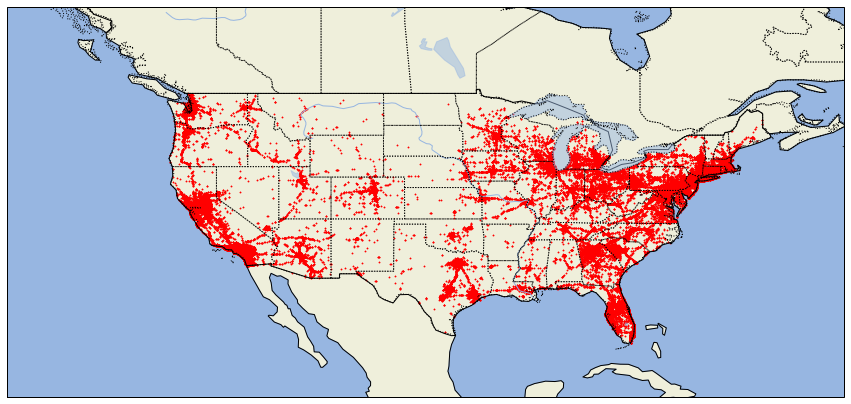

In [22]:
lng_2016 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2016]
lat_2016 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2016]

#Map of accidents in the US in 2016
fig_2016 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2016 = fig_2016.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2016.add_feature(cfeat.LAND)
ax_2016.add_feature(cfeat.OCEAN)
ax_2016.add_feature(cfeat.COASTLINE)
ax_2016.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2016.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2016.add_feature(cfeat.RIVERS)

ax_2016.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2016.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2016.scatter(lng_2016, lat_2016, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:
lng_2017 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2017]
lat_2017 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2017]

#Map of accidents in the US in 2017
fig_2017 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2017 = fig_2017.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2017.add_feature(cfeat.LAND)
ax_2017.add_feature(cfeat.OCEAN)
ax_2017.add_feature(cfeat.COASTLINE)
ax_2017.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2017.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2017.add_feature(cfeat.RIVERS)

ax_2017.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2017.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2017.scatter(lng_2017, lat_2017, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:

lng_2018 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2018]
lat_2018 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2018]

#Map of accidents in the US in 2018
fig_2018 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2018 = fig_2018.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2018.add_feature(cfeat.LAND)
ax_2018.add_feature(cfeat.OCEAN)
ax_2018.add_feature(cfeat.COASTLINE)
ax_2018.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2018.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2018.add_feature(cfeat.RIVERS)

ax_2018.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2018.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2018.scatter(lng_2018, lat_2018, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:

lng_2019 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2019]
lat_2019 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2019]

#Map of accidents in the US in 2019
fig_2019 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2019 = fig_2019.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2019.add_feature(cfeat.LAND)
ax_2019.add_feature(cfeat.OCEAN)
ax_2019.add_feature(cfeat.COASTLINE)
ax_2019.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2019.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2019.add_feature(cfeat.RIVERS)

ax_2019.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2019.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2019.scatter(lng_2019, lat_2019, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [ ]:

lng_2020 = df_lat_lng['Start_Lng'].loc[df_lat_lng['Year'] == 2020]
lat_2020 = df_lat_lng['Start_Lat'].loc[df_lat_lng['Year'] == 2020]

#Map of accidents in the US in 202020
fig_2020 = plt.figure(figsize = (15, 15))

#Features of the US map
ax_2020 = fig_2020.add_subplot(1,1,1,projection = ccrs.PlateCarree())
ax_2020.add_feature(cfeat.LAND)
ax_2020.add_feature(cfeat.OCEAN)
ax_2020.add_feature(cfeat.COASTLINE)
ax_2020.add_feature(cfeat.BORDERS, linestyle = '-')
ax_2020.add_feature(cfeat.LAKES, alpha = 0.5)
ax_2020.add_feature(cfeat.RIVERS)

ax_2020.set_extent((-140, -60, 20, 50))

state_borders = cfeat.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', 
                                          scale = '50m', facecolor = 'none')

ax_2020.add_feature(state_borders, linestyle = 'dotted', edgecolor = 'black')
#End of features
ax_2020.scatter(lng_2020, lat_2020, transform = ccrs.PlateCarree(), marker = '*', s = 1, c= 'r')

In [23]:
a = np.zeros(13)

In [24]:
for i in range(32,45):
    b = i-32
    column_sum = np.sum(df.iloc[:,i])
    a[b] = column_sum
a.format(num)

In [25]:
pd.options.display.float_format = '{:.2f}'.format

In [27]:
list_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
               'Roundabout', 'Station', 'Stop','Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

In [29]:
len(list_columns)

13

In [30]:
zipped = list(zip(list_columns,a))
zipped

[('Amenity', 42082.0),
 ('Bump', 606.0),
 ('Crossing', 274533.0),
 ('Give_Way', 9564.0),
 ('Junction', 284454.0),
 ('No_Exit', 4384.0),
 ('Railway', 31175.0),
 ('Roundabout', 184.0),
 ('Station', 70321.0),
 ('Stop', 51976.0),
 ('Traffic_Calming', 1401.0),
 ('Traffic_Signal', 623631.0),
 ('Turning_Loop', 0.0)]

In [31]:
df_poi = pd.DataFrame(zipped, columns = ['POI', 'Count'])

Text(0.5, 1.0, 'Total amount of accidents for each POI')

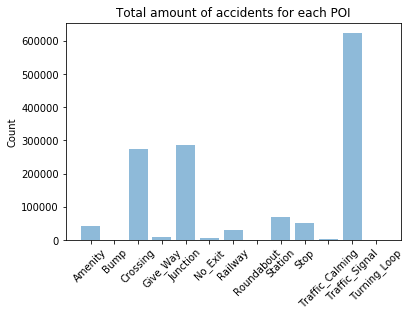

In [32]:
plt.bar(df_poi['POI'], df_poi['Count'], alpha = 0.5)
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Total amount of accidents for each POI')

In [33]:
from wordcloud import WordCloud, STOPWORDS

In [34]:
stopwords = set(STOPWORDS)
comment_words = ''
df_str = str(df['Description'])

for i in range(len(df_str)):
    tokens = df_str.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens) + " "
    

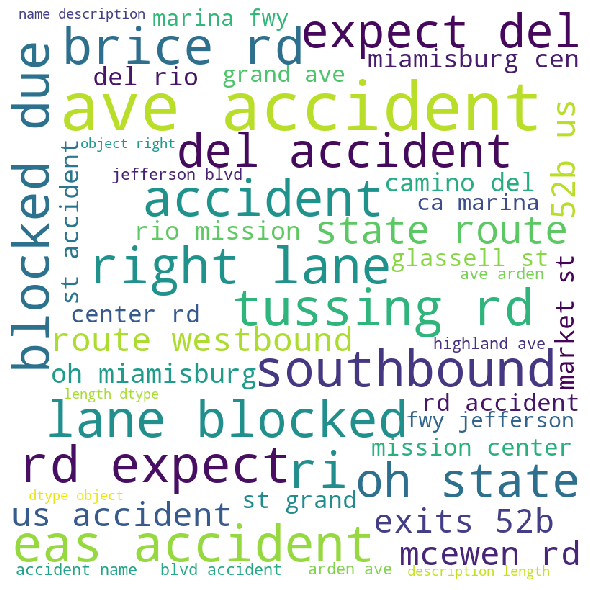

In [35]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', 
                     stopwords = stopwords, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()